### **1.1. Imports and data loading**

Start by importing packages needed to build the decision tree to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualizations
import matplotlib.pyplot as plt
import graphviz

# Import packages for data modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Load the data from the data file into a dataframe.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("./breast_cancer.csv")

### **1.2. Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(569, 33)

Get basic information about the dataset.

In [5]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Drop irrelevant columns

In [6]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check for and handle missing values

In [8]:
# Check for missing values
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Comment:** 

Check for and handle duplicates

In [9]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

**Comment:** 

**Comment:** Decision tree is robust to outliers, so there is no need to impute or drop any values based on where they fall in their distribution.

Check class balance.

In [10]:
# Check class balance
data["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

**Comment:**

### **1.3. Feature selection and transformation**

In [11]:
data1 = data.copy()
# Encode target variable
data1['diagnosis'] = data1['diagnosis'].replace({'B': 0, 'M': 1})

data1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3436\3017270999.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['diagnosis'] = data1['diagnosis'].replace({'B': 0, 'M': 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **2.1. Preparing training and test datasets**

Shuffle the dataset before splitting

In [12]:
# Shuffle the dataset


Assign target variable.

**Note:**
In this case, the target variable is `label_column`.
* 0 represents ...
* 1 represents ...

In [13]:
# Isolate label variable
label = data1['diagnosis']

Isolate the features.

In [14]:
# Isolate features
feature_df = data1.drop(['diagnosis'], axis=1)

# Display first few rows of features dataframe
feature_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split data with train/test ratio: 40/60

In [15]:
feature_train_1, feature_test_1, label_train_1, label_test_1 = train_test_split(feature_df, label, test_size=0.6, random_state=0, stratify=label)

Split data with train/test ratio: 60/40

In [16]:
feature_train_2, feature_test_2, label_train_2, label_test_2 = train_test_split(feature_df, label, test_size=0.4, random_state=0, stratify=label)

Split data with train/test ratio: 80/20

In [17]:
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(feature_df, label, test_size=0.2, random_state=0, stratify=label)

Split data with train/test ratio: 90/10

In [18]:
feature_train_4, feature_test_4, label_train_4, label_test_4 = train_test_split(feature_df, label, test_size=0.1, random_state=0, stratify=label)

Visualize the class distributions in all datasets

In [19]:
# Visualize class distributions


### **2.2. Building and Visualizing the Decision Tree Classifiers**

For the the dataset 1 (40/60)

In [20]:
# Instantiate the model
decision_tree_1 = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree_1.fit(feature_train_1, label_train_1)

DecisionTreeClassifier(random_state=0)

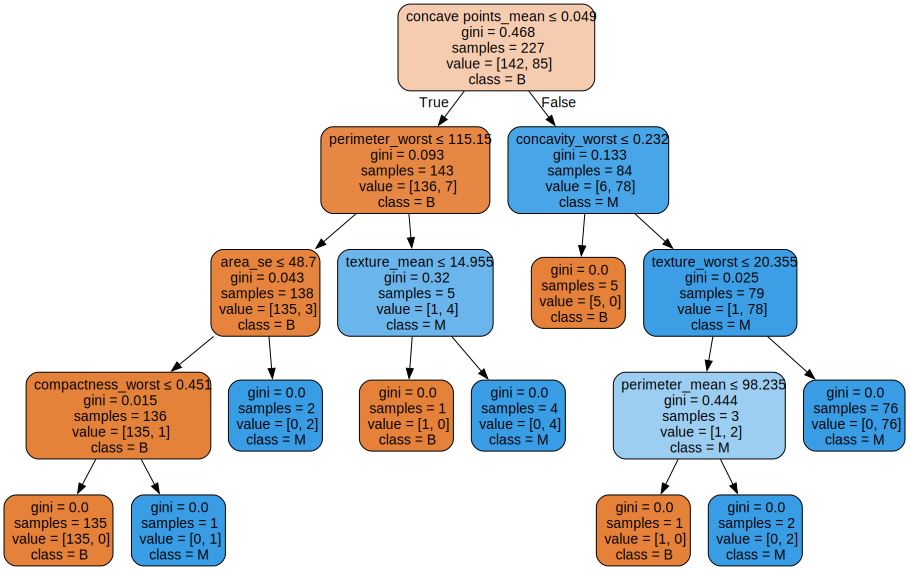

In [21]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_1,
                feature_names=feature_train_1.columns,
                class_names=['B', 'M'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

For the dataset 2 (60/40)

In [22]:
# Instantiate the model
decision_tree_2 = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree_2.fit(feature_train_2, label_train_2)

DecisionTreeClassifier(random_state=0)

In [23]:
# Visualize the decision tree


For the dataset 3 (80/20)

In [24]:
# Instantiate the model
decision_tree_3 = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree_3.fit(feature_train_3, label_train_3)

DecisionTreeClassifier(random_state=0)

In [25]:
# Visualize the decision tree


For the dataset 4 (90/10)

In [26]:
# Instantiate the model
decision_tree_4 = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree_4.fit(feature_train_4, label_train_4)

DecisionTreeClassifier(random_state=0)

In [27]:
# Visualize the decision tree


### **2.3. Evaluating the decision tree classifiers**

Function for plotting the confusion matrix

In [28]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

For the dataset 1 (40/60)

In [29]:
label_pred_1 = decision_tree_1.predict(feature_test_1)

In [32]:
# Create the classification report
target_labels = ['B', 'M']
print(classification_report(label_test_1, label_pred_1, target_names=target_labels))

              precision    recall  f1-score   support

           B       0.94      0.93      0.93       215
           M       0.88      0.90      0.89       127

    accuracy                           0.92       342
   macro avg       0.91      0.91      0.91       342
weighted avg       0.92      0.92      0.92       342



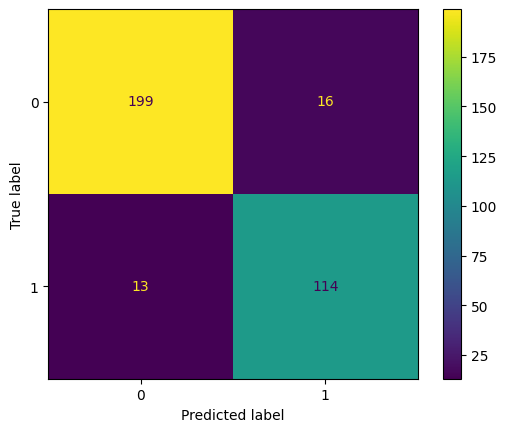

In [31]:
# Create the confusion matrix
conf_matrix_plot(decision_tree_1, feature_test_1, label_test_1)

For the dataset 2 (60/40)

For the dataset 3 (80/20)

For the dataset 4 (90/10)